In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\prodigy intern\task2\train.csv')
test_df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\prodigy intern\task2\test.csv')
gender_submission = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\prodigy intern\task2\gender_submission.csv')

In [3]:
# Combine the training and test datasets for analysis
full_df = pd.concat([train_df, gender_submission], sort=False)

In [4]:
print("Total number of passengers:", len(full_df))
print("Total number of survivors:", len(full_df[full_df["Survived"] == 1]))
print("Total number of deaths:", len(full_df[full_df["Survived"] == 0]))

Total number of passengers: 1309
Total number of survivors: 494
Total number of deaths: 815


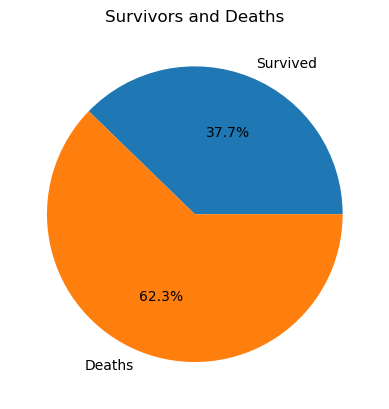

In [5]:
# Plot the distribution of survivors and deaths
survivors = len(full_df[full_df["Survived"] == 1])
deaths = len(full_df[full_df["Survived"] == 0])
plt.pie([survivors, deaths], labels=["Survived", "Deaths"], autopct='%1.1f%%')
plt.title("Survivors and Deaths")
plt.show()

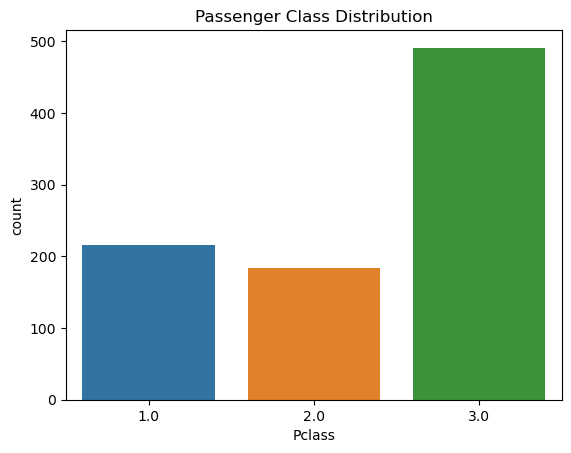

In [6]:
# Analyze passenger class distribution
sns.countplot(x='Pclass', data=full_df)
plt.title("Passenger Class Distribution")
plt.show()

In [7]:
# Calculate the average age of passengers
average_age = round(full_df["Age"].mean(), 2)
print("Average passenger age:", average_age)

Average passenger age: 29.7


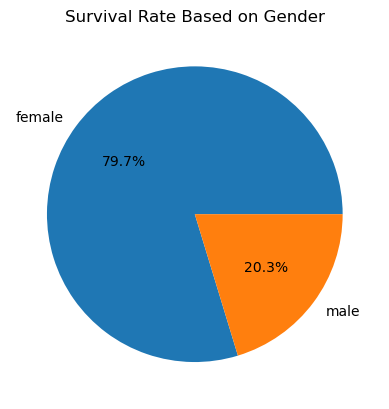

In [8]:
# Calculate survival rate based on gender
survival_by_gender = full_df.groupby("Sex")["Survived"].mean() * 100
plt.pie(survival_by_gender, labels=["female", "male"], autopct='%1.1f%%')
plt.title("Survival Rate Based on Gender")
plt.show()

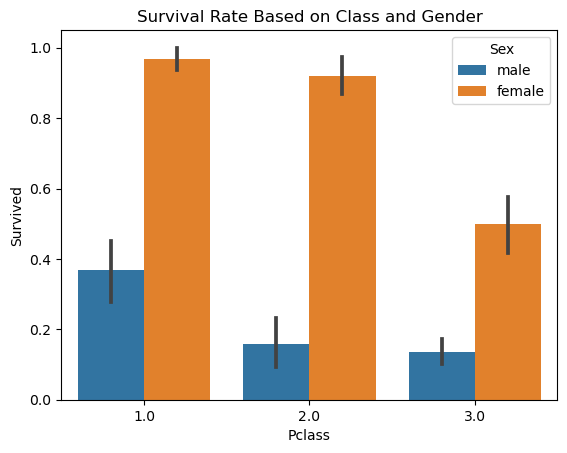

In [9]:
# Calculate survival rate based on passenger class and gender
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=full_df)
plt.title("Survival Rate Based on Class and Gender")
plt.show()

In [10]:
# Calculate average fare paid by passengers in each class
average_fare_by_class = full_df.groupby("Pclass")["Fare"].mean()
print("Average fare paid by passengers from each class:")
print(average_fare_by_class)

Average fare paid by passengers from each class:
Pclass
1.0    84.154687
2.0    20.662183
3.0    13.675550
Name: Fare, dtype: float64


Survival rate based on age and sex distribution:
Sex     AgeGroup
female  0-18        0.676471
        18-30       0.755556
        30-50       0.779070
        50-80       0.941176
male    0-18        0.338028
        18-30       0.155556
        30-50       0.225806
        50-80       0.127660
Name: Survived, dtype: float64


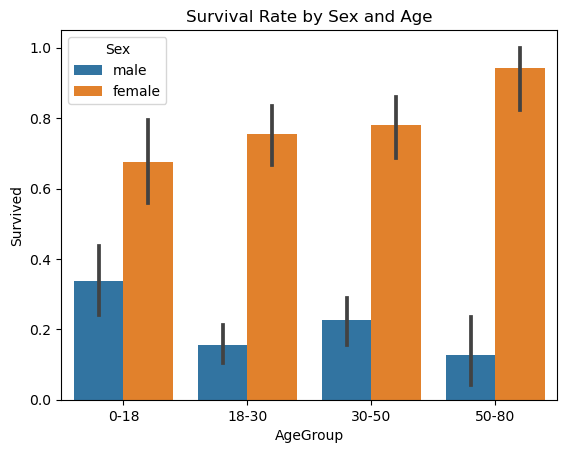

In [11]:
# Calculate survival rate based on age and sex
age_bins = [0, 18, 30, 50, 80]
age_labels = ["0-18", "18-30", "30-50", "50-80"]
full_df["AgeGroup"] = pd.cut(full_df["Age"], bins=age_bins, labels=age_labels)
survival_by_age_sex = full_df.groupby(["Sex", "AgeGroup"])["Survived"].mean()
print("Survival rate based on age and sex distribution:")
print(survival_by_age_sex)
sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=full_df)
plt.title("Survival Rate by Sex and Age")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8140\1777349040.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PassengerId', y='Survived', data=full_df, ci=None)


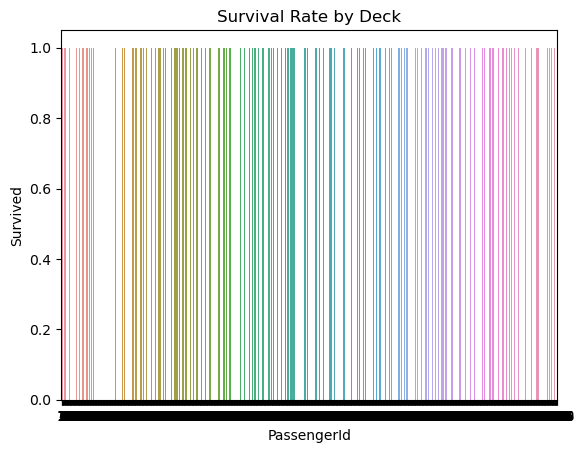

In [13]:
# Plot the survival rates by deck as a bar chart
sns.barplot(x='PassengerId', y='Survived', data=full_df, ci=None)
plt.title("Survival Rate by Deck")
plt.show()